## Exploratory Data Analysis

[Text(0, 0, 'Hardees'), Text(1, 0, 'Carls Jr.')]

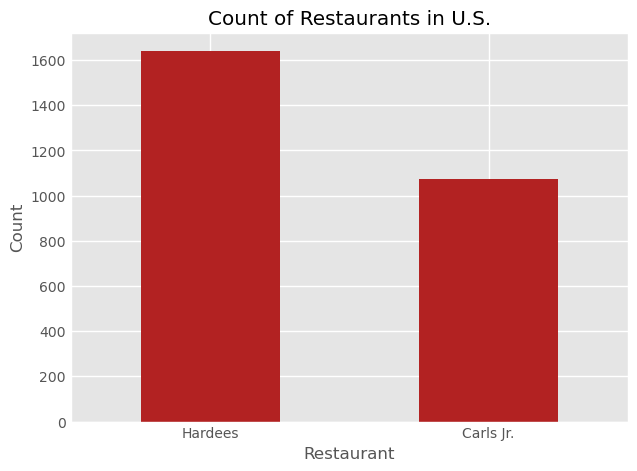

In [27]:
#Import libraries
import pandas as pd
import geopandas
from matplotlib import pyplot as plt 
import folium
from folium import plugins

# Load data
geodata = pd.read_csv('geodata.csv')

# Load geodataframe
gdf = geopandas.GeoDataFrame(
    geodata, geometry=geopandas.points_from_xy(geodata.longitude, geodata.latitude), crs="EPSG:4326")

# Plot bar chart of restaurant counts by chain
plt.style.use('ggplot')
fig, ax = plt.subplots()
rest_counts = gdf['restaurant'].value_counts()
rest_counts.plot(kind = 'bar', color = 'firebrick')
plt.ylabel('Count')
plt.xlabel('Restaurant')
plt.title('Count of Restaurants in U.S.')
ax.set_xticklabels(['Hardees', 'Carls Jr.'], rotation = 0)


In [29]:
m = folium.Map(location=[gdf.geometry.y.mean(), gdf.geometry.x.mean()], zoom_start=3)
# Define a color mapping for restaurant types
color_mapping = {
    'HD': 'red',
    'CJ': 'yellow',
}
marker_cluster = plugins.MarkerCluster().add_to(m)

# Add restaurant points to the map and color them based on the "type" column
for index, row in gdf.iterrows():
    type_name = row['restaurant']
    color = color_mapping.get(type_name, 'gray')  # Use 'gray' as the default color
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=2,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"Type: {type_name}"
    ).add_to(marker_cluster)
m
